In [1]:
# imports
import numpy as np

import sys as sys
import os
import tkinter as tk
from tkinter import filedialog

import matplotlib.pylab as plt
import time

In [35]:
# options
zsave = False

In [36]:
# function for debugging
def pause():
    programPause = input('Press <ENTER> to continue.')

In [37]:
root = tk.Tk()
root.withdraw()

raw = filedialog.askopenfilename(title = 'Choose metadata file to process:.csv' )

basename = str(os.path.basename(raw))
savename = basename[:-4]
print (savename)
os.chdir(os.path.dirname(raw))   #set your working directoryimport os

metadata


In [38]:
string_to_find = 'TimeStampMsec'

line_num = 0
timestamps_str = []
try:
    with open(basename, 'r') as read_obj:
        for line in read_obj:
            line_num += 1
            if string_to_find in line:
                timestamps_str.append(line.rstrip())
                #timestamps.append((line_num, line.rstrip()))
    print('Found ' + str(len(timestamps_str)) + ' timestamps')
except IOError:
    print('Could not find timestamps in metadata')
    sys.exit(1)


Found 1000 timestamps


In [39]:
timestamps = []
for timestamp in timestamps_str:
    num_timestamp = ''.join(c for c in timestamp if (c.isdigit() or c =='.'))
    timestamps.append(float(num_timestamp))

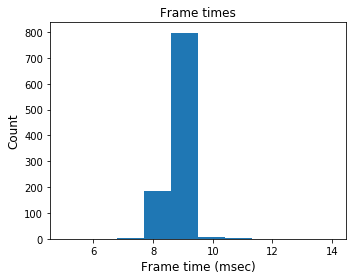

In [40]:
frame_times = [t - s for s, t in zip(timestamps, timestamps[1:])]

#plot run length histogram
fig, ax = plt.subplots(1,1, figsize=(5, 4))
ax.hist(frame_times, density=False)
ax.set_title("Frame times", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xlabel("Frame time (msec)", fontsize=12)
plt.tight_layout()
# save fig
if zsave == True:
    script_dir = os.path.abspath('..') #os.path.dirname('..')
    results_dir = os.path.join(script_dir, 'Results/')
    file_name = 'FrameTimes{}.png'.format(dt.datetime.now().strftime('%Y%m%d%H%M%S'))
    if not os.path.isdir(results_dir):    
        os.makedirs(results_dir)
    plt.savefig(results_dir + file_name)
plt.show()